In [ ]:
import io
import cv2
import urllib
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

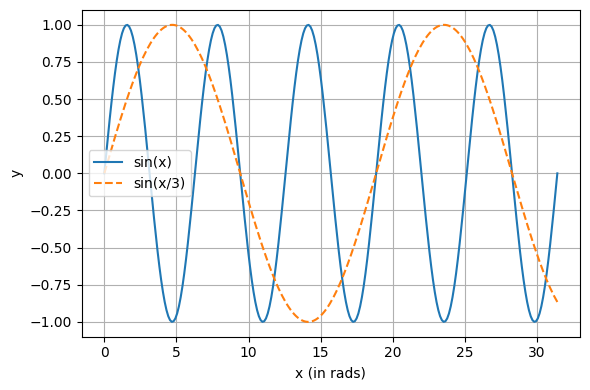

In [ ]:
# Set the signal length for generating the data points.
signal_length = 256

# Generate an array 'x' with linearly spaced values from 0 to 10π,
# used as the input for our sine functions.
x = np.linspace(0, 10 * np.pi, signal_length)

# Calculate the sine of 'x' to generate a sinusoidal waveform.
y = np.sin(x)  # This represents a basic sine wave.

# Generate a second sine wave with a modified frequency,
# by dividing 'x' by 3 before taking the sine.
# This results in a wave with a lower frequency compared to 'y',
# demonstrating the effect of input scaling on frequency.
y_1 = np.sin(x/3)


plt.figure(figsize=(6, 4))
plt.plot(x, y, label='sin(x)')
plt.plot(x, y_1, label='sin(x/3)', linestyle='--')

plt.xlabel('x (in rads)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

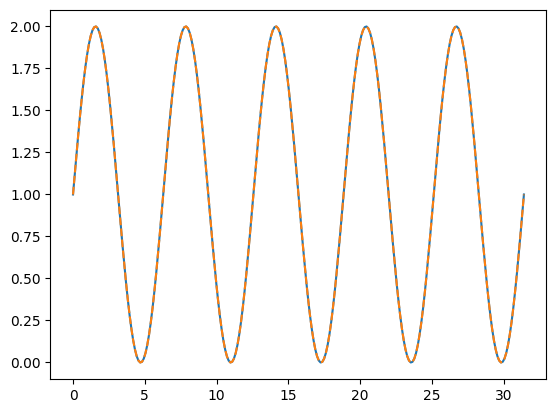

In [ ]:
y_old = y

# Modify 'y' by adding its maximum value to every element.
# This effectively shifts the entire sine wave upwards, making all values positive.
y += max(y) # offseting the sine wave by the max value

plt.plot(x, y, label='positive sin(x)')
plt.plot(x, y_old, label='sin(x)', linestyle='--')

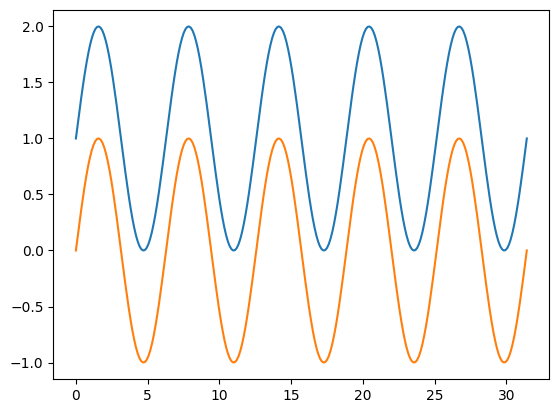

In [ ]:
y = np.sin(x)

# Deep Copy
# The np.copy() function is used to ensure that 'y_old' is a separate array in memory,
# not just a reference to 'y'.
y_old = np.copy(y)

# Modify 'y' by adding its maximum value to every element.
# This effectively shifts the entire sine wave upwards, making all values positive
y += max(y) # offseting the sine wave by the max value

plt.plot(x, y, label='positive sin(x)')
plt.plot(x, y_old, label='sin(x)')

In [ ]:
np.max(y)

1.9990514394267318

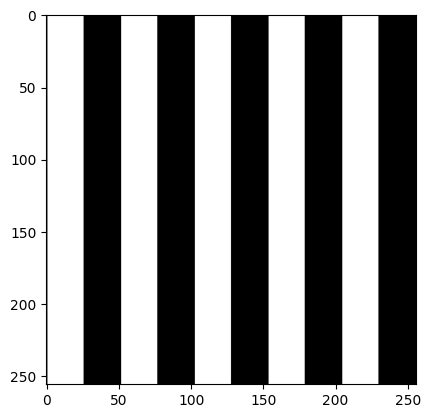

In [ ]:
# Generating a 2D sine wave image
# Create a 2D array 'img' where each row is a copy of the sine wave 'y'.
# This loop constructs a square matrix where every row is identical, consisting of the sine wave values.

# The comprehension iterates over the 'signal_length' twice,
# effectively duplicating the 'y' array into each row of the new 2D array.
# Note: This approach generates a vertical sine wave pattern when visualized, as
# each column of pixels represents a point in the sine wave across the vertical axis.
img = np.array([[y[j] for j in range(signal_length)]
                for i in range(signal_length)],
                dtype=np.uint8)

plt.imshow(img, cmap="gray")

Why the binary blocks?

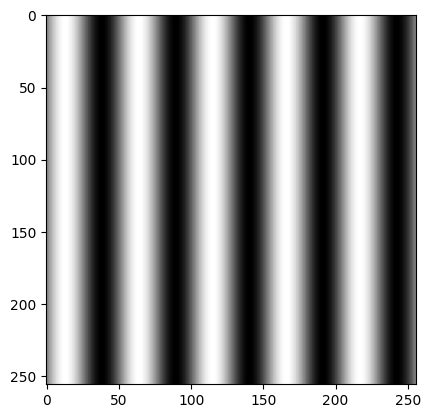

In [ ]:
# Generating a 2D sine wave image
img = np.array([[y[j] * 127 for j in range(signal_length)]
                for i in range(signal_length)],
               dtype=np.uint8)
plt.imshow(img, cmap="gray")

# Why 127 ?

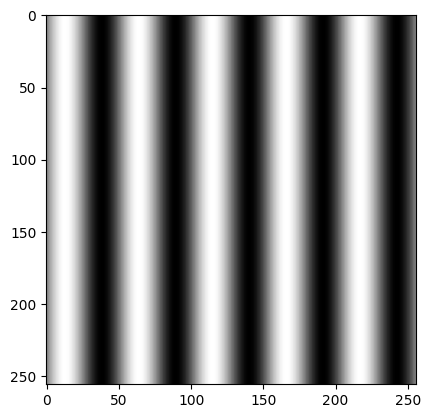

In [ ]:
# Generating a 2D sine wave image
img = np.array([[y[j] * 100 for j in range(signal_length)]
                for i in range(signal_length)],
               dtype=np.uint8)
plt.imshow(img, cmap="gray")

# Why 127 ?

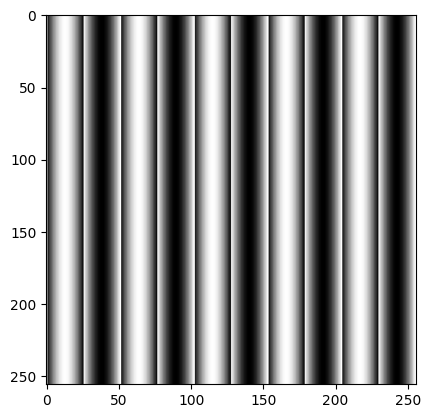

In [ ]:
# Generating a 2D sine wave image
img = np.array([[y[j]*255 for j in range(signal_length)]
                for i in range(signal_length)],
               dtype=np.uint8)
plt.imshow(img, cmap="gray")

# What now?

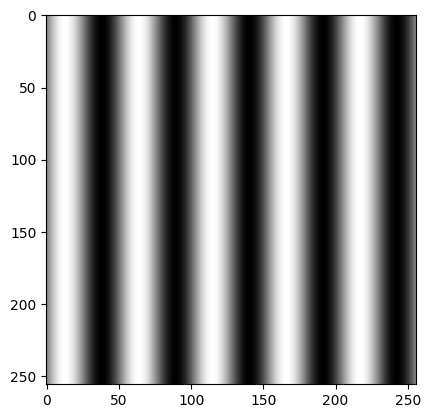

In [ ]:
# Generating a 2D sine wave image
img = np.array([[y[j]*255 for j in range(signal_length)]
                for i in range(signal_length)],
              )
# Notice the difference in dtype. It is missing, defaulting to the data type of y
plt.imshow(img, cmap="gray")

*Detour to Fourier in 1D*

In [ ]:
# Generating a 2D sine wave image
img = np.array([[y[j]*127 for j in range(signal_length)]
                for i in range(signal_length)],
               dtype=np.uint8)

# Compute the DFT of the image (img)
dft = cv2.dft(img)

# type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'dft'

error: OpenCV(4.8.0) /io/opencv/modules/core/src/dxt.cpp:3508: error: (-215:Assertion failed) type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'dft'


In [ ]:
# Generating a 2D sine wave image
img = np.array([[y[j]*127 for j in range(signal_length)]
                for i in range(signal_length)],
               dtype=np.uint8)
dft = cv2.dft(np.float32(img))
print(dft)

# Anything wrong ?

[[ 8.2844160e+06 -2.3168945e+01 -6.7340762e+03 ... -1.1632737e+03
   1.7500366e+02 -1.2800000e+03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


In [ ]:
print(dft[0][0])
print(type(dft[0][0])) # We have a real number instead of a complex number

8284416.0
<class 'numpy.float32'>


In [ ]:
img = np.array([[y[j]*127 for j in range(signal_length)]
                for i in range(signal_length)],
               dtype=np.uint8)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

print(dft[0][0])

[8284416.       0.]


In [ ]:
img = np.array([[y[j]*127 for j in range(signal_length)] for i in range(signal_length)],
               dtype=np.uint8)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

magnitude_spectrum = cv2.magnitude(dft[:, :, 0], dft[:, :, 1])

# magnitude_spectrum = 20 x log(magnitude(dft)) # Why? - Standard

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1]))

<ipython-input-18-a3eb7861cfa5>:9: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1]))


Why? Any solutions?

In [ ]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1]) + 1)

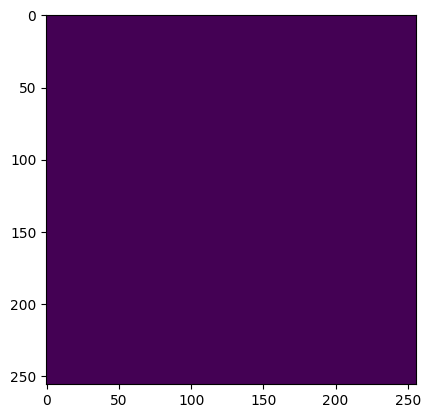

In [ ]:
plt.imshow(magnitude_spectrum)

*Another detour to Fourier in 1D*

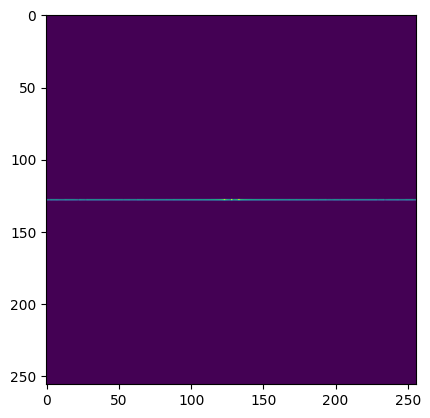

In [ ]:
dft_shift = np.fft.fftshift(dft) # Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum_dft_shift = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
plt.imshow(magnitude_spectrum_dft_shift)

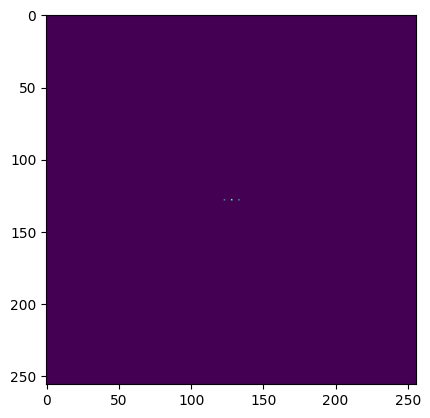

In [ ]:
# To get the results looking similar to the slides
plt.imshow(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

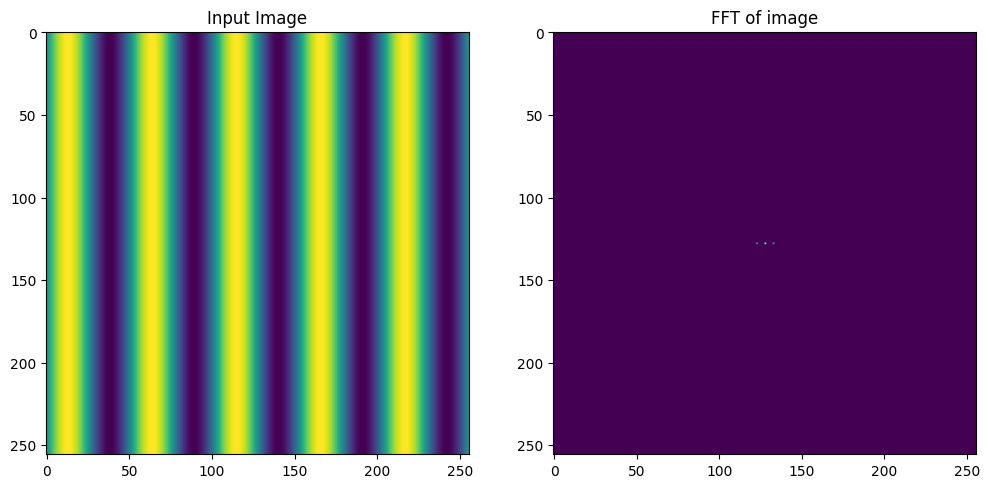

In [ ]:
signal_length = 256
x = np.linspace(0 * np.pi, 10 * np.pi, signal_length)
y = np.sin(x)
y += max(y)

img = np.array([[y[j]*127 for j in range(signal_length)] for i in range(signal_length)],
               dtype=np.uint8)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# magnitude_spectrum_dft_shift = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
magnitude_spectrum_dft_shift = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

cmap="gray"
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(magnitude_spectrum_dft_shift)
ax2.title.set_text('FFT of image')
plt.show()

What if we shift the signal?

What does this *shifting* signify?

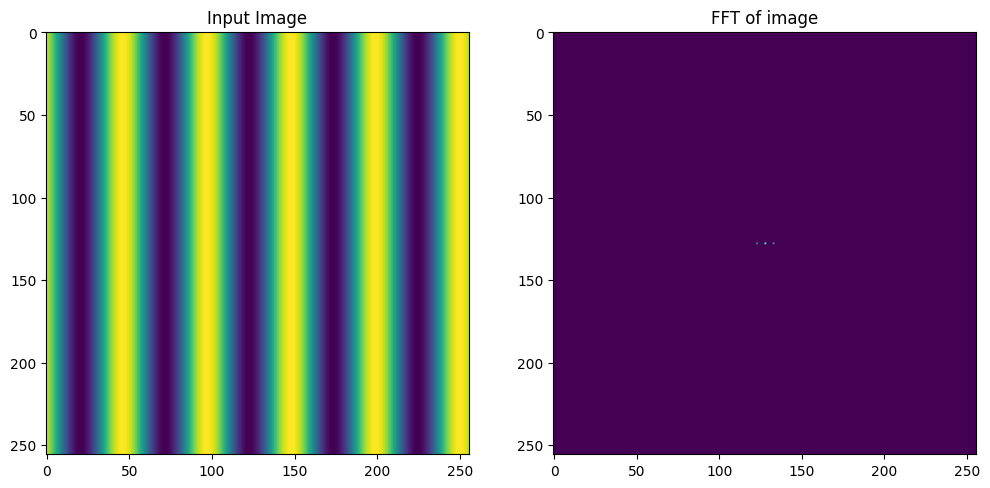

In [ ]:
signal_length = 256
shift = 0.7 # You can play with this.
x = np.linspace((0 + shift) * np.pi, (10 + shift) * np.pi, signal_length)
y = np.sin(x)
y += max(y)

img = np.array([[y[j]*127 for j in range(signal_length)] for i in range(signal_length)],
               dtype=np.uint8)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# magnitude_spectrum_dft_shift = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
magnitude_spectrum_dft_shift = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(magnitude_spectrum_dft_shift)
ax2.title.set_text('FFT of image')
plt.show()

In [ ]:
def plot_image_and_fft(y, cmap="gray"):
  img = np.array([[y[j] for j in range(signal_length)] for i in range(signal_length)])
  dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
  # magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
  fig = plt.figure(figsize=(7, 7))
  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(img, cmap=cmap)
  ax1.title.set_text('Input Image')
  ax2 = fig.add_subplot(1,2,2)
  ax2.imshow(magnitude_spectrum, cmap=cmap)
  ax2.title.set_text('FFT of image')
  plt.show()

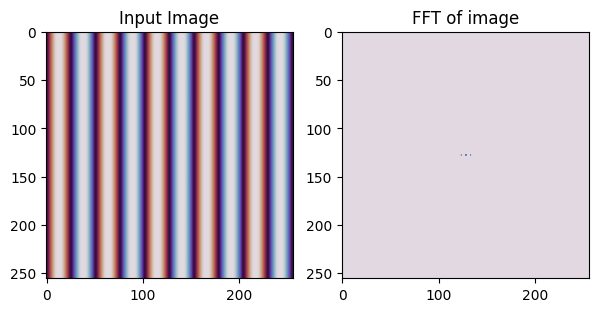

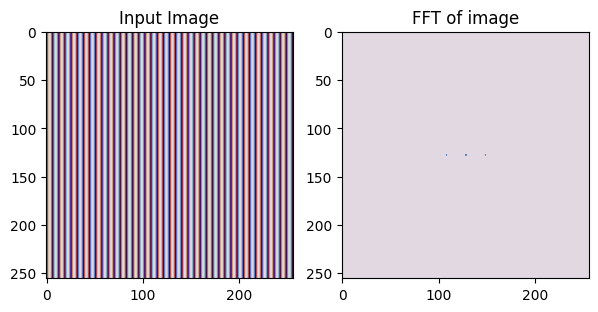

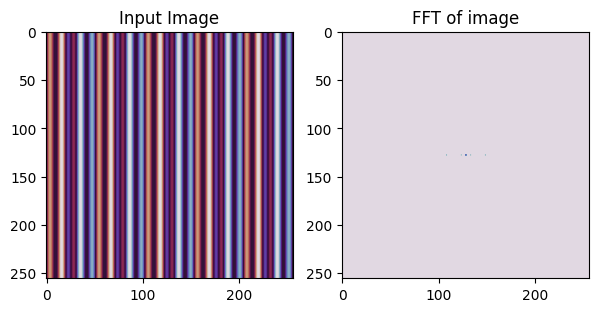

In [ ]:
signal_length = 256
shift = 0
x = np.linspace((0 + shift) * np.pi, (10 + shift) * np.pi, signal_length)

y1 = np.sin(x)
y1 += max(y1)

y2 = np.sin(4 * x)
y2 += max(y2)

cmap= "gray"
cmap="twilight"

plot_image_and_fft(y1, cmap)

plot_image_and_fft(y2, cmap)

y3 = (y1 + y2)/3
plot_image_and_fft(y3, cmap)

In [ ]:
def plot_image_and_fft_with_rotation(y, cmap="gray", rotation=False):
  img = np.array([[y[j] for j in range(signal_length)] for i in range(signal_length)])

  if rotation:
    img = np.rot90(img)

  dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
  # magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
  fig = plt.figure(figsize=(7, 7))
  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(img, cmap=cmap)
  ax1.title.set_text('Input Image')
  ax2 = fig.add_subplot(1,2,2)
  ax2.imshow(magnitude_spectrum, cmap=cmap)
  ax2.title.set_text('FFT of image')
  plt.show()

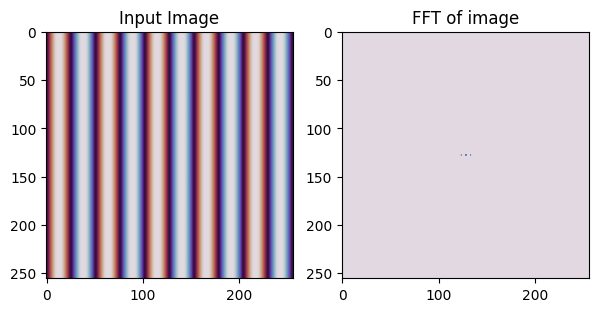

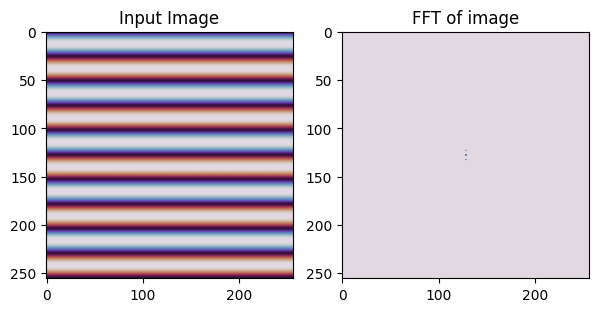

In [ ]:
signal_length = 256
shift = 0
x = np.linspace((0 + shift) * np.pi, (10 + shift) * np.pi, signal_length)

y1 = np.sin(x)
y1 += max(y1)

cmap= "twilight"
plot_image_and_fft_with_rotation(y1, cmap, rotation=False)
plot_image_and_fft_with_rotation(y1, cmap, rotation=True)

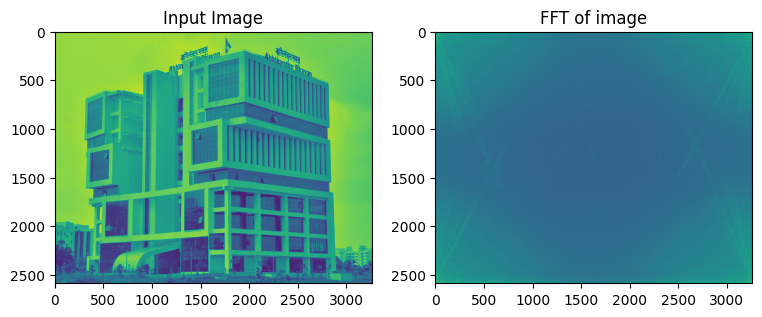

In [ ]:
img = cv2.imread("/content/abhinandan.jpeg", 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
cmap = "viridis" # viridis

dft_shift = np.fft.fftshift(dft)
dft_shift = dft

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap=cmap)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(magnitude_spectrum, cmap=cmap)
ax2.title.set_text('FFT of image')
plt.show()

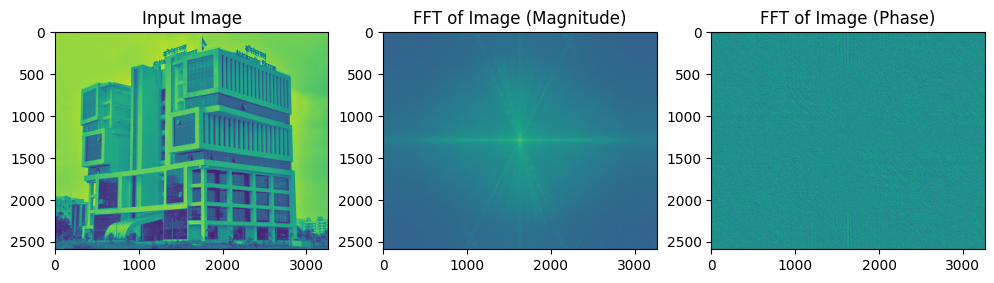

In [ ]:
img = cv2.imread("/content/abhinandan.jpeg", 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
cmap = "viridis" # viridis

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
phase_spectrum = cv2.phase(dft_shift[:, :, 0], dft_shift[:, :, 1])

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img, cmap=cmap)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(magnitude_spectrum, cmap=cmap)
ax2.title.set_text('FFT of Image (Magnitude)')
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(phase_spectrum, cmap=cmap)
ax2.title.set_text('FFT of Image (Phase)')
plt.show()

## Filtering in frequency domain

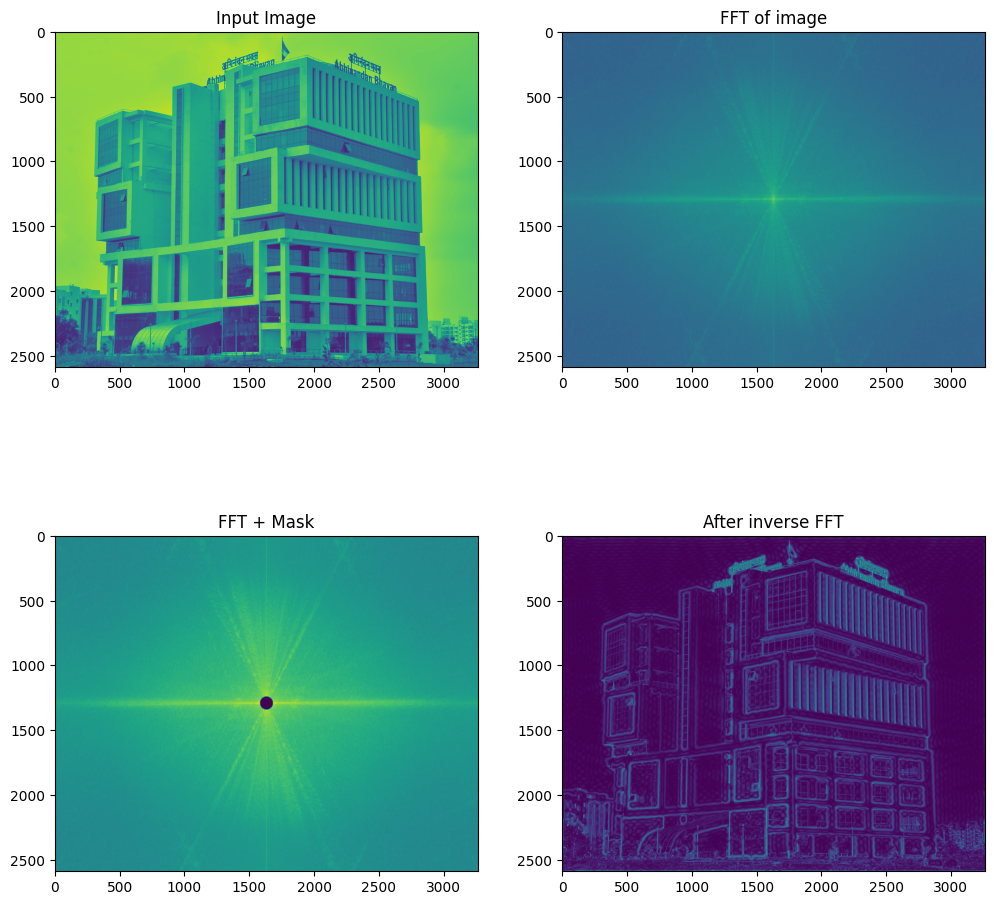

In [ ]:
img = cv2.imread('/content/abhinandan.jpeg', 0)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Obtain the number of rows and columns in the image to calculate the center of the image.
rows, cols = img.shape
row_center, col_center = rows // 2, cols // 2

# Create a mask with the same dimensions as the image, initially setting all values to one
# (pass all frequencies).
mask = np.ones((rows, cols, 2), np.uint8)

# Define the radius of the circle in the mask to block (or pass) frequencies.
r = 50

# Calculate the center position for the circular mask.
center = [row_center, col_center]

# Create a grid of the same shape as the image.
x, y = np.ogrid[:rows, :cols] # meshgrid versus ogrid

# Create a circular mask area with radius 'r' around the center of the image.
# x2 + y2 = r2;
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0 # Set the mask value to 0 (block frequencies) within the circular area.

# Apply the mask to the shifted DFT, effectively filtering the frequency spectrum.
# Convolution in spatial domain is Product in frequency domain
fshift = dft_shift * mask
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + 1)

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap=cmap)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap=cmap)
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap=cmap)
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap=cmap)
ax4.title.set_text('After inverse FFT')
plt.show()

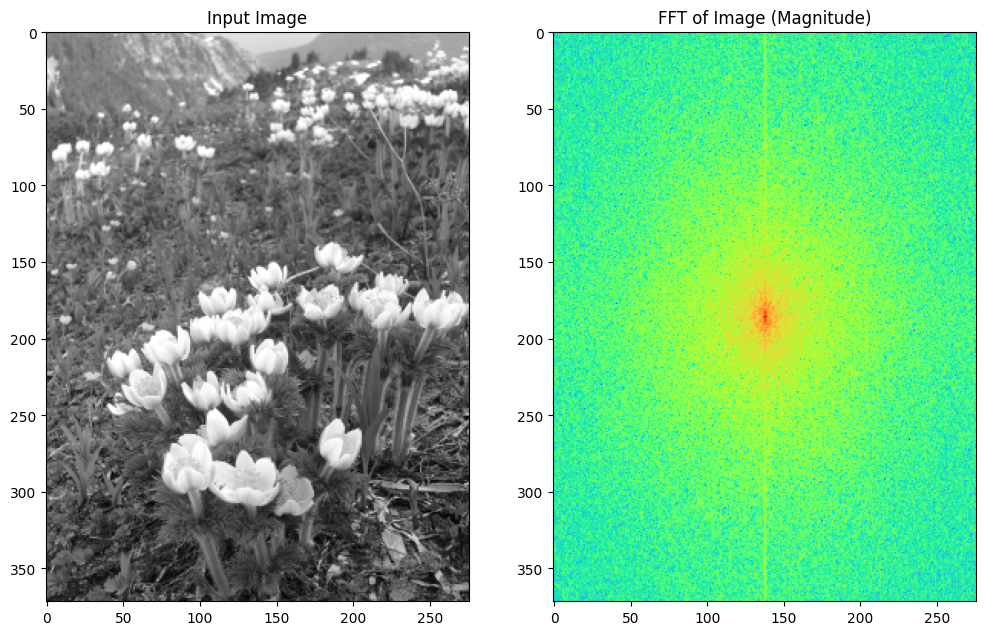

In [ ]:
img = cv2.imread("/content/Tulips.png", 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
cmap = "gray" # viridis

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap=cmap)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(magnitude_spectrum, cmap="turbo")
ax2.title.set_text('FFT of Image (Magnitude)')
plt.show()

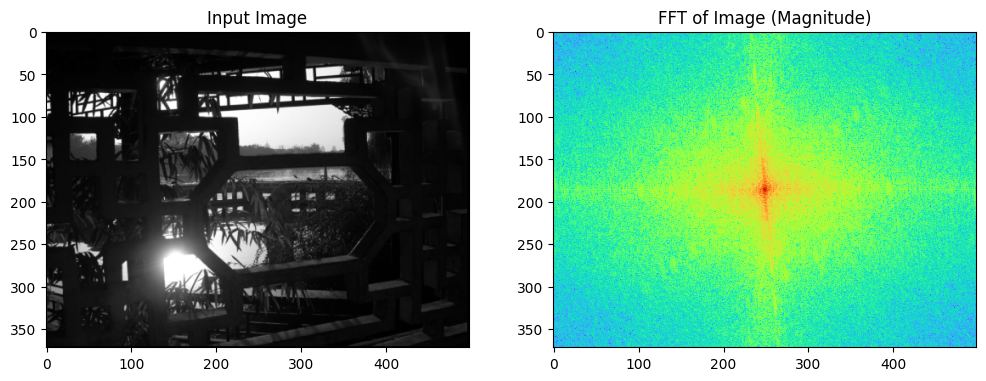

In [ ]:
img = cv2.imread("/content/machine.png", 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
cmap = "gray" # viridis

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap=cmap)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(magnitude_spectrum, cmap="turbo")
ax2.title.set_text('FFT of Image (Magnitude)')
plt.show()

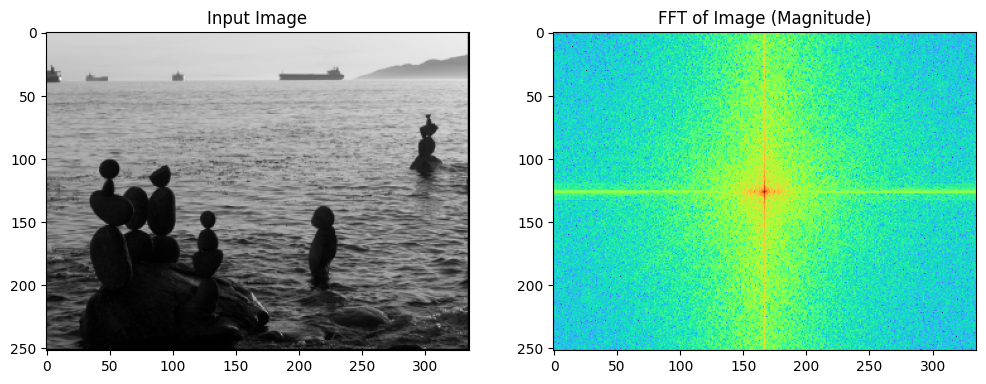

In [ ]:
img = cv2.imread("/content/sagar.png", 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
cmap = "gray" # viridis

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap=cmap)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(magnitude_spectrum, cmap="turbo")
ax2.title.set_text('FFT of Image (Magnitude)')
plt.show()